In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from helpers.math_helper import MathHelper
config = np.seterr(over='ignore')

In [2]:
image_seeds = cv2.imread('../data/seeds.jpg', cv2.IMREAD_GRAYSCALE)
image_hawkes = cv2.imread('../data/Hawkes_Bay_NZ.jpg', cv2.IMREAD_GRAYSCALE)
image_kapitol = cv2.imread('../data/capitol.jpg', cv2.IMREAD_GRAYSCALE)
image_flowers = cv2.imread('../data/flowers.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
def getEqualization(sourceImage):
    
    normalizedImage = np.copy(sourceImage)
    
    min, max = MathHelper.getMinMax(sourceImage.ravel())

    h,w = np.shape(normalizedImage)

    for py in range(0,h):
        for px in range(0,w):
            x = normalizedImage[py][px]
            normalizedImage[py][px] = MathHelper.normalizeWithMinMax(x,min, max)*255;
            
    return normalizedImage

In [13]:
def getLocalEqualization(sourceImage,boxSize):
    padding = (boxSize-1)/2
    
    normalizedImage = np.copy(sourceImage)

    h,w = np.shape(normalizedImage)
    
    for py in range(0,h):
        for px in range(0,w):
            x = sourceImage[py][px]
            
            y_upperLimit = py+padding
            y_lowerLimit = py-padding
            
            x_upperLimit = py+padding
            x_lowerLimit = py-padding
            
            if(y_upperLimit > h):
                y_upperLimit= h
                
            if(y_lowerLimit < 0):
                y_lowerLimit= 0
            
            if(x_lowerLimit > 0):
                x_lowerLimit= 0
            
            if(x_upperLimit > w):
                x_upperLimit= w
            
            imageBox = sourceImage[y_lowerLimit:y_upperLimit][x_lowerLimit:x_upperLimit]
            
             
            min, max = MathHelper.getMinMax(imageBox.ravel())
            
            normalizedImage[py][px] = MathHelper.normalizeWithMinMax(x,min, max)*255;
            
    return normalizedImage

### Display Results

In [4]:
def display_image(image1,image2,image3,title,boxSize):

    fig1 = plt.figure(figsize = (12,12))

    hist1 = fig1.add_subplot(4,3,5) 
    hist2 = fig1.add_subplot(4,3,6)
    hist3 = fig1.add_subplot(4,3,6)

    ax1 = fig1.add_subplot(2,3,1) 
    ax2 = fig1.add_subplot(2,3,2)
    ax3 = fig1.add_subplot(2,3,2)

    ax1.set_title(title+' original image')
    ax2.set_title('after qualization')
    ax3.set_title('after local equalization '+boxSize+'x'+boxSize)

    hist1.hist(image1.ravel(),255,[0,255])
    hist2.hist(image2.ravel(),255,[0,255])
    hist2.hist(image3.ravel(),255,[0,255])


    ax1.imshow(image1, vmin=0, vmax=255, cmap="gray")
    ax2.imshow(image2, vmin=0, vmax=255, cmap="gray")
    ax3.imshow(image2, vmin=0, vmax=255, cmap="gray")

    plt.show()

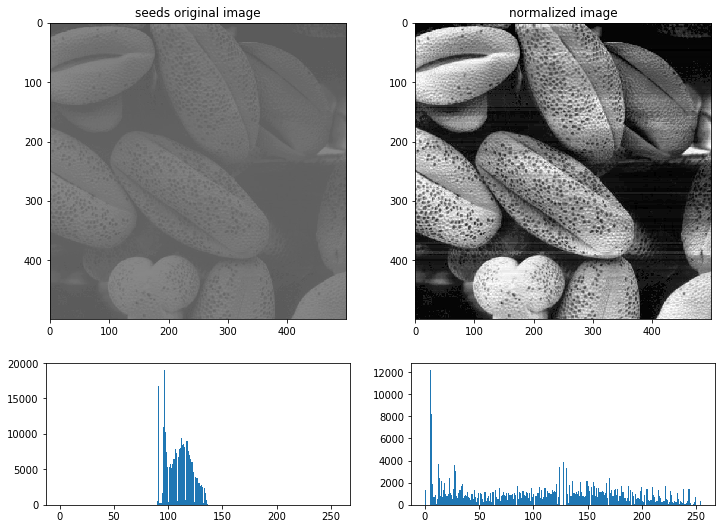

In [5]:
box_size=5
image_seeds_equalization = getEqualization(image_seeds)
image_seeds_local_equalization = getNormalaizedImage(image_seeds,box_size)

display_image(image_seeds,image_seeds_normalized,image_seeds_local_equalization,'seeds',box_size)

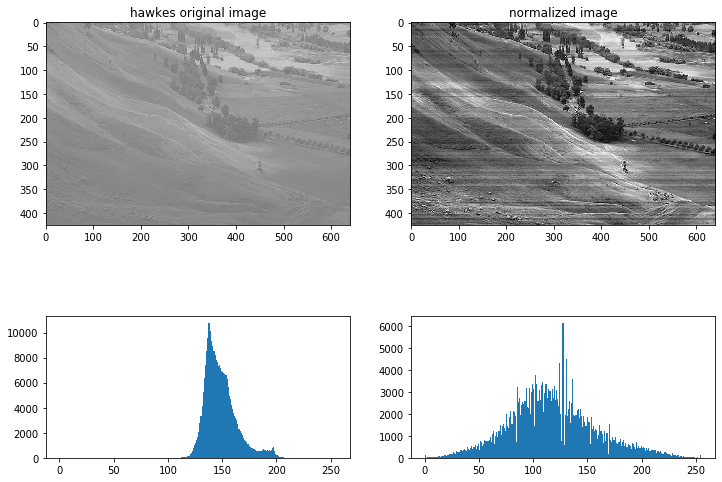

In [7]:
box_size=5
image_hawkes_equalization = getEqualization(image_hawkes)
image_hawkes_local_equalization = getNormalaizedImage(image_hawkes,box_size)

display_image(image_hawkes,image_hawkes_equalization,image_hawkes_local_equalization,'hawkes',box_size)

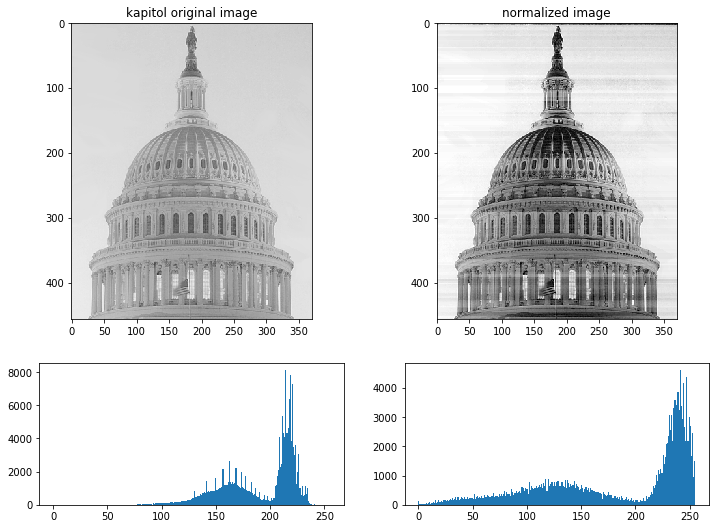

In [12]:
box_size=5
image_hawkes_equalization = getEqualization(image_kapitol)
image_hawkes_local_equalization = getNormalaizedImage(image_kapitol,box_size)

display_image(image_kapitol,image_kapitol_equalization,image_kapitol_local_equalization,'kapitol',box_size)

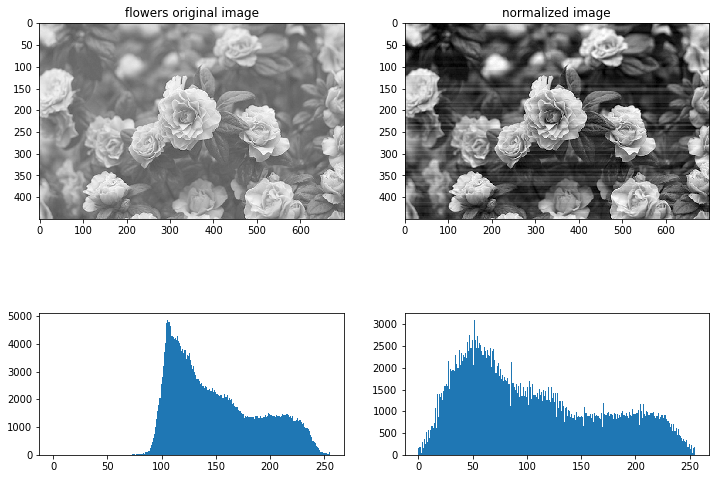

In [9]:
box_size=5
image_flowers_equalization = getEqualization(image_flowers)
image_flowers_local_equalization = getNormalaizedImage(image_flowers,box_size)

display_image(image_flowers,image_flowers_equalization,image_flowers_local_equalization,'flowers',box_size)